###  Biomechanical features of orthopedic patients

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("column_2C_weka.csv")
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


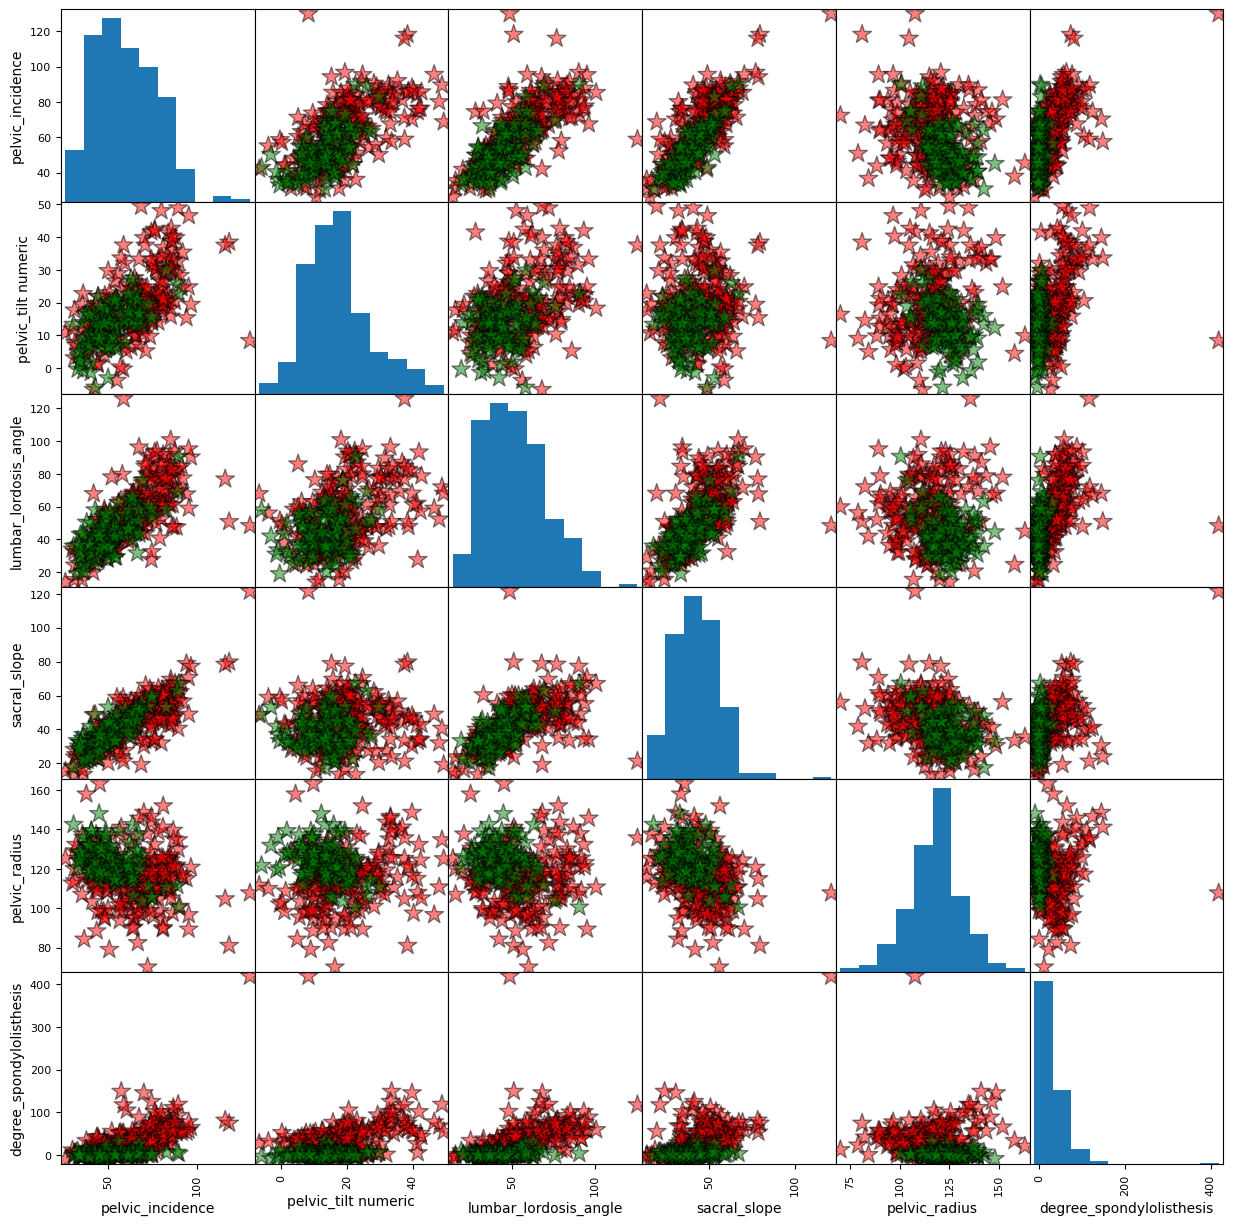

In [5]:
color_list = ['red' if i=='Abnormal' else 'green' for i in df.loc[:,'class']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

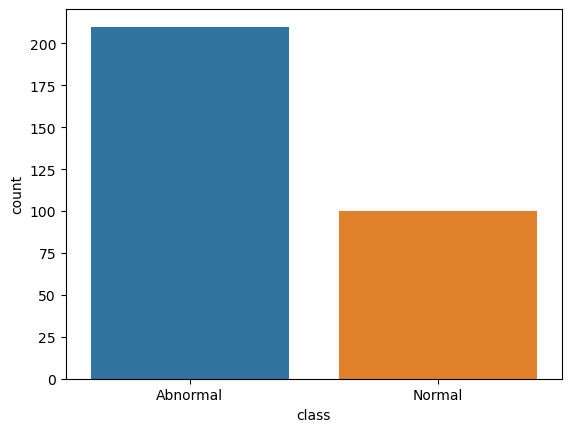

In [46]:
sns.countplot(x="class", data=df)
df.loc[:,'class'].value_counts()

## Multiple Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
mul_linear_reg = LinearRegression()

In [49]:
x = df.iloc[:,[0,1,2,3,4,5]].values
x

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       ...,
       [ 61.44659663,  22.6949683 ,  46.17034732,  38.75162833,
        125.6707246 ,  -2.70787952],
       [ 45.25279209,   8.69315736,  41.5831264 ,  36.55963472,
        118.5458418 ,   0.21475017],
       [ 33.84164075,   5.07399141,  36.64123294,  28.76764934,
        123.9452436 ,  -0.19924909]])

In [50]:
df["new_class"] = [1 if x == "Abnormal" else 0 for x in df["class"]]

In [51]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,new_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1


In [52]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,new_class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,0
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal,0


In [53]:
y = df.new_class.values.reshape(-1, 1)

In [54]:
mul_linear_reg.fit(x,y)

LinearRegression()

In [55]:
mul_linear_reg.intercept_


array([2.14761767])

In [56]:
mul_linear_reg.coef_

array([[-7.20760231e+05,  7.20760237e+05,  3.53560126e-03,
         7.20760223e+05, -1.30656888e-02,  5.42311578e-03]])

In [57]:
from sklearn.metrics import r2_score

In [58]:
y_head = mul_linear_reg.predict(x)

In [59]:
Linear_r2 = r2_score(y, y_head)
Linear_r2

0.3413106848277274

## Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [62]:
y = y.ravel()
rf.fit(x,y)

RandomForestRegressor(random_state=42)

In [63]:
y_head = rf.predict(x)


In [64]:
rf_r2 = r2_score(y, y_head)
rf_r2

0.9262332857142858

## Polynomial Linear Regression

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
pol_reg = PolynomialFeatures(degree = 4)

In [67]:
x_pol = pol_reg.fit_transform(x)

In [68]:
x_pol

array([[ 1.00000000e+00,  6.30278175e+01,  2.25525860e+01, ...,
         6.30129915e+02, -1.62461035e+00,  4.18859464e-03],
       [ 1.00000000e+00,  3.90569510e+01,  1.00609915e+01, ...,
         2.72667725e+05,  1.08782081e+04,  4.33991264e+02],
       [ 1.00000000e+00,  6.88320210e+01,  2.22184820e+01, ...,
         1.39996573e+05, -4.66322303e+03,  1.55329867e+02],
       ...,
       [ 1.00000000e+00,  6.14465966e+01,  2.26949683e+01, ...,
         1.15804894e+05, -2.49529635e+03,  5.37671911e+01],
       [ 1.00000000e+00,  4.52527921e+01,  8.69315736e+00, ...,
         6.48096491e+02,  1.17405071e+00,  2.12683619e-03],
       [ 1.00000000e+00,  3.38416408e+01,  5.07399141e+00, ...,
         6.09891274e+02, -9.80435208e-01,  1.57610584e-03]])

In [69]:
lin_reg2 = LinearRegression()

In [70]:
lin_reg2.fit(x_pol,y)

LinearRegression()

In [71]:
y_head2 = lin_reg2.predict(x_pol)

In [72]:
Poly_r2 = r2_score(y, y_head2)
Poly_r2

0.6097392959461849

## Decision Tree Regression

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
tree_reg = DecisionTreeRegressor()

In [77]:
tree_reg.fit(x,y)

DecisionTreeRegressor()

In [78]:
y_head = tree_reg.predict(x)

In [79]:
Dec_r2 = r2_score(y, y_head)
Dec_r2

1.0

## R2_SCORE Visualization

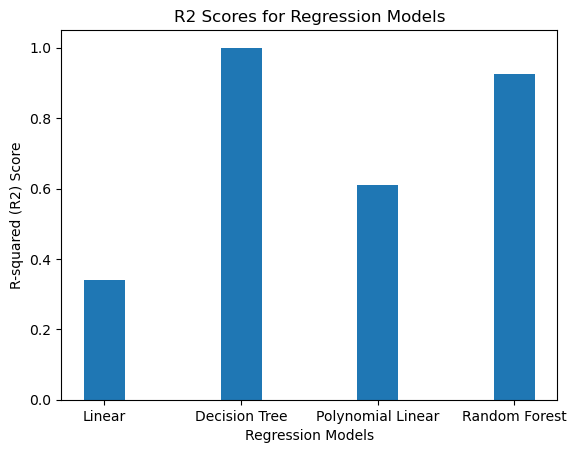

In [110]:
models = ["Linear", "Decision Tree", "Polynomial Linear", "Random Forest"]
r2_scores = [Linear_r2,Dec_r2, Poly_r2, rf_r2]

plt.bar(models, r2_scores, width=0.3)
plt.xlabel("Regression Models")
plt.ylabel("R-squared (R2) Score")
plt.title("R2 Scores for Regression Models")
plt.show()

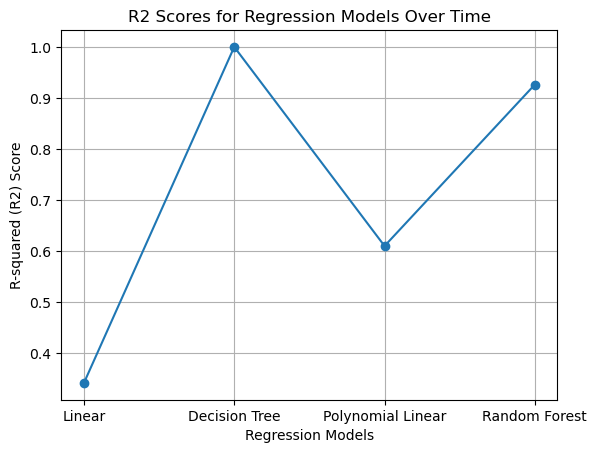

In [111]:
plt.plot(models, r2_scores, marker='o')
plt.xlabel("Regression Models")
plt.ylabel("R-squared (R2) Score")
plt.title("R2 Scores for Regression Models Over Time")
plt.grid(True)
plt.show()

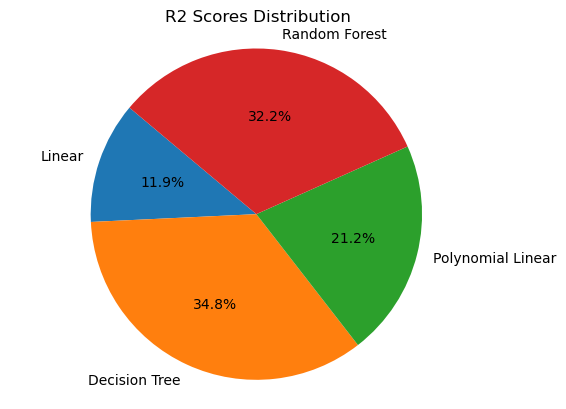

In [112]:
plt.pie(r2_scores, labels=models, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("R2 Scores Distribution")
plt.show()